In [8]:
#import keras as krs
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [9]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3_
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [10]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

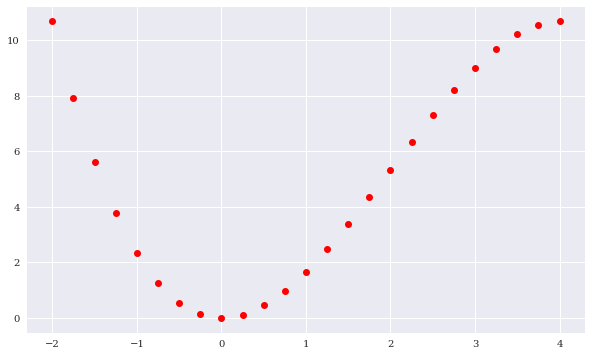

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [12]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [13]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [14]:
y_ = alpha + beta * x

In [15]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

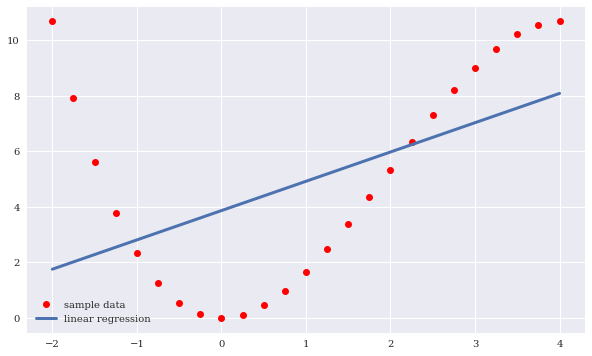

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


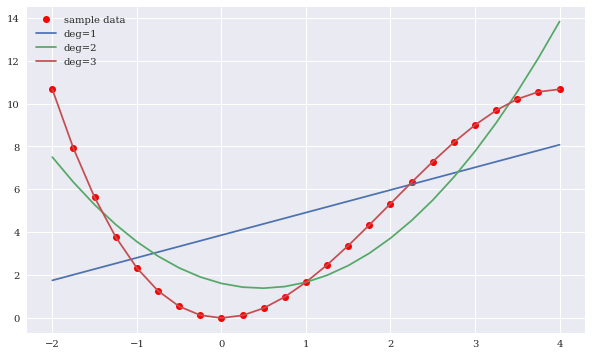

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) **2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
    plt.legend();
    

In [18]:
#Scikit-learn The MLPRegressor implements a DNN for estimation DNN sometimes called multy layer perceptron

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3 * [256],
                    learning_rate_init=0.03,
                    max_iter=5000)

In [19]:
model.fit(x.reshape(-1, 1), y)


MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [20]:
y_ = model.predict(x.reshape(-1, 1))

In [21]:
MSE = ((y - y_) ** 2).mean()
MSE

0.00817311037348132

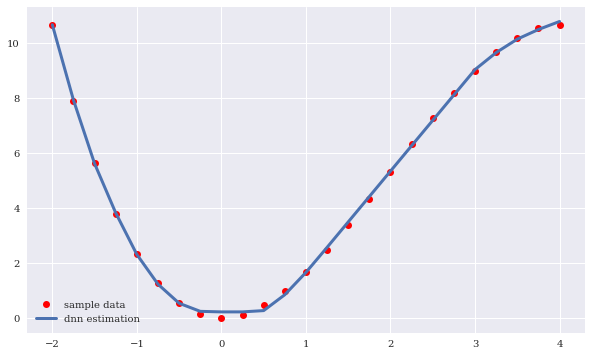

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

In [23]:
tf.random.set_seed(100)
import tensorflow as tf

In [24]:
from keras.layers import Dense
from keras.models import Sequential


ModuleNotFoundError: No module named 'keras'

Sequential model with keras deep learning package the model is fixed or trained, for 100 epochs. repeated five rounds with the approximation by the neural network updated and plotted
graph below shows the approxiation improvemnt and also relflects the MSE decreasing

In [211]:
model = Sequential() # instantiates the sequential model object
model.add(Dense(256, activation='relu', input_dim=1)) # adds a densly connected hidden layer wt rectified linear unit(ReLU)
model.add(Dense(1, activation='linear')) # adds the output layer with linear activation
model.compile(loss='mse', optimizer='rmsprop') # compiles the model for useage 

In [212]:
((y - y_) ** 2).mean()

0.010708722449519828

In [1]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False) # trains the neutal network for a fixed number of epochs 
    y_ = model.predict(x) # implements the approximation step
    MSE = ((y - y_.flatten()) ** 2).mean() # calculates the current MSE
    print(f'round={_} | MSE={MSE:.5f}') 
    plt.plot(x, y_, '--', label=f'round={_}') # plots the current approximation results
plt.legend()

NameError: name 'plt' is not defined

Below code generates the random sample data and creates the ols regresion estimation based on the a varying number of monomial basis functions.
the estimation results are still not too good. The MSE value is accordingly relatively high

In [214]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


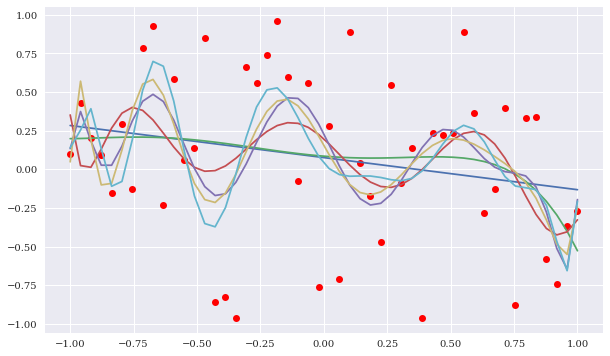

In [215]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2 ).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')

OLS regression in this case assumes that the approximation can be achived through an appropriate combination of finite number of basic funtions. OLS regression does not perform well in this case

Neural networks performs better than OLS regression in estimating random label values from random features values. 
Given its architecture however, the NENEt has almsot 200,00 traiable parameters(weights) which offers flexibility 

In [232]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu')) # multiple hidden layers
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [233]:
model.summary()
#network architecture and number of trainable parameters are shown

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               512       
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


round=1 | MSE0.11657
round=2 | MSE0.07637
round=3 | MSE0.07434
round=4 | MSE0.03794
round=5 | MSE0.03902
round=6 | MSE0.02990
round=7 | MSE0.01262
Wall time: 7.32 s


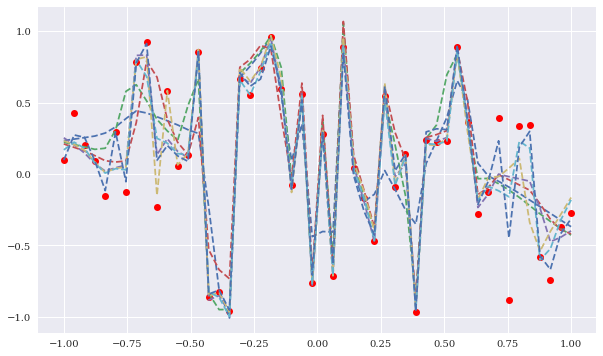

In [234]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE{MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
    

round=1 | MSE=0.00239
round=2 | MSE=0.00228
round=3 | MSE=0.00147
round=4 | MSE=0.06024
round=5 | MSE=0.00086
round=6 | MSE=0.00006
round=7 | MSE=0.00137
Wall time: 6.93 s


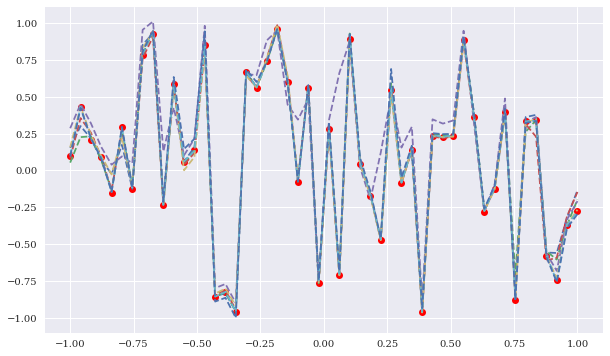

In [223]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_= model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')

classification with Neutal Networks
can easily be used fro classification tasks as well.
the major adjustment made modeling-wise is to change the activation fuction from the output layer to sigmoid from linear.

In [244]:
f = 5
n = 10

In [245]:
np.random.seed(100)

In [246]:
x = np.random.randint(0, 2, (n, f)) # creates random faetues data
x  

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [247]:
y = np.random.randint(0, 2, n)
y # creates random labels  data

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [254]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid')) # defines the activation funtion for the output layers as sigmoid
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc']) #defines the loss funtion to be binary_crossentropy

In [255]:
model.fit(x, y, epochs=50, verbose=False)

In [256]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [257]:
y == y_ # compares the predicted values with the labels data

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [260]:
res = pd.DataFrame(model.history.history) # plots the loss funtion and accurary values for every training step

In [263]:
res.plot(figsize=(10, 6)); # plots the loss funtion and accurary values for every training step

TypeError: no numeric data to plot

The examples in this section illustrate some fundamental characterristics of neural natworks as compared to OLS regression 

Problem-agnostics
The NeuNet approach is agnostic when it comes to estimating and classifying label values, 

Incremental learning
The optimal weights within a neural network, given a target measure of success, are learned incrementally based on a random initialization and incremental improvements. incremental improvements are achieved by considering the differences between the predicted values and the sample label values and back. propagating weightsupdates through the neural networks

Universal approximation
there are strong mathamatical theorems showing that neural networks(even with one hidden layer only)can approximate almost any funtion

Neural nets
are good at learning relationships between input and output data. and applied to a number of problems types, such as estimation in the presence of the complex relationships pr classification

In [121]:
f = 10
n = 250


In [122]:
np.random.seed(100)

In [123]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [124]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [125]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 0, 0, 0])

In [126]:
fcols = [f'f{_}' for _ in range (f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [127]:
data = pd.DataFrame(x, columns= fcols)
data['l'] = y

In [132]:
grouped = data.groupby(list(data.columns))

In [133]:
freq = grouped['l'].size().unstack(fill_value=0)

In [134]:
freq.head(10)

l                              0  1
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9      
0  0  0  0  0  0  0  1  1  1   0  1
                  1  0  1  0   2  0
                           1   0  1
               1  0  0  0  0   0  1
                           1   1  0
                     1  1  1   1  0
                  1  0  0  0   0  1
                        1  0   0  1
            1  0  0  0  1  1   0  1
                  1  1  0  0   1  0

In [138]:
freq['sum'].describe().astype(int)

KeyError: 'sum'

In [144]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [145]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128], 
                      max_iter=1000, random_state=100)

In [146]:
model.fit(data[fcols], data['l'])
MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
             random_state=100)

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [147]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [162]:
split =int(len(data) * 0.7)

In [163]:
train = data[:split]
test = data[split:]

In [165]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [166]:
MLPClassifier(hidden_layer_sizes=[128, 128,], max_iter=1000,
             random_state=100)

MLPClassifier(hidden_layer_sizes=[128, 128], max_iter=1000, random_state=100)

In [167]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [171]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.4533333333333333

In [173]:
factor = 50

In [174]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                  columns=fcols)

In [ ]:
train = big[:split]
test = big[split:]

In [175]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [177]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [181]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.4533333333333333

In [187]:
grouped = big.groupby(list(data.columns))

KeyError: 'l'

In [183]:
freq = grouped['l'].size().unstack(fill_value=0)

In [185]:
freq['sum'] = freq[0] + freq[1]

In [186]:
freq.head(6)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   2  0    2
                           1   0  1    1
               1  0  0  0  0   0  1    1
                           1   1  0    1
                     1  1  1   1  0    1